# <b>CS156 (Introduction to AI), Spring 2021</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: Neeval Kumar
### Preferred Name (if different): Chosen Name
### Student ID: 011877086
### Email address: kumar.neeval@gmail.com
Any special notes or anything you would like to communicate to me about this homework submission goes in here.

##  <u>References and sources </u>

List all your references and sources here.
This includes all sites/discussion boards/blogs/posts/etc. where you grabbed some code examples.

##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [120]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [121]:
np.random.seed(42)

#### Load the dataset.

In [122]:

happiness_df = pd.read_csv(r"./homework3_input_data.csv")
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### Plot all independent variables vs. the dependent variable (similar to how I demonstrated in the Regression.Boston.ipynb Jupyter notebook). This will show you the relationship between each independent variable and the dependent variable.

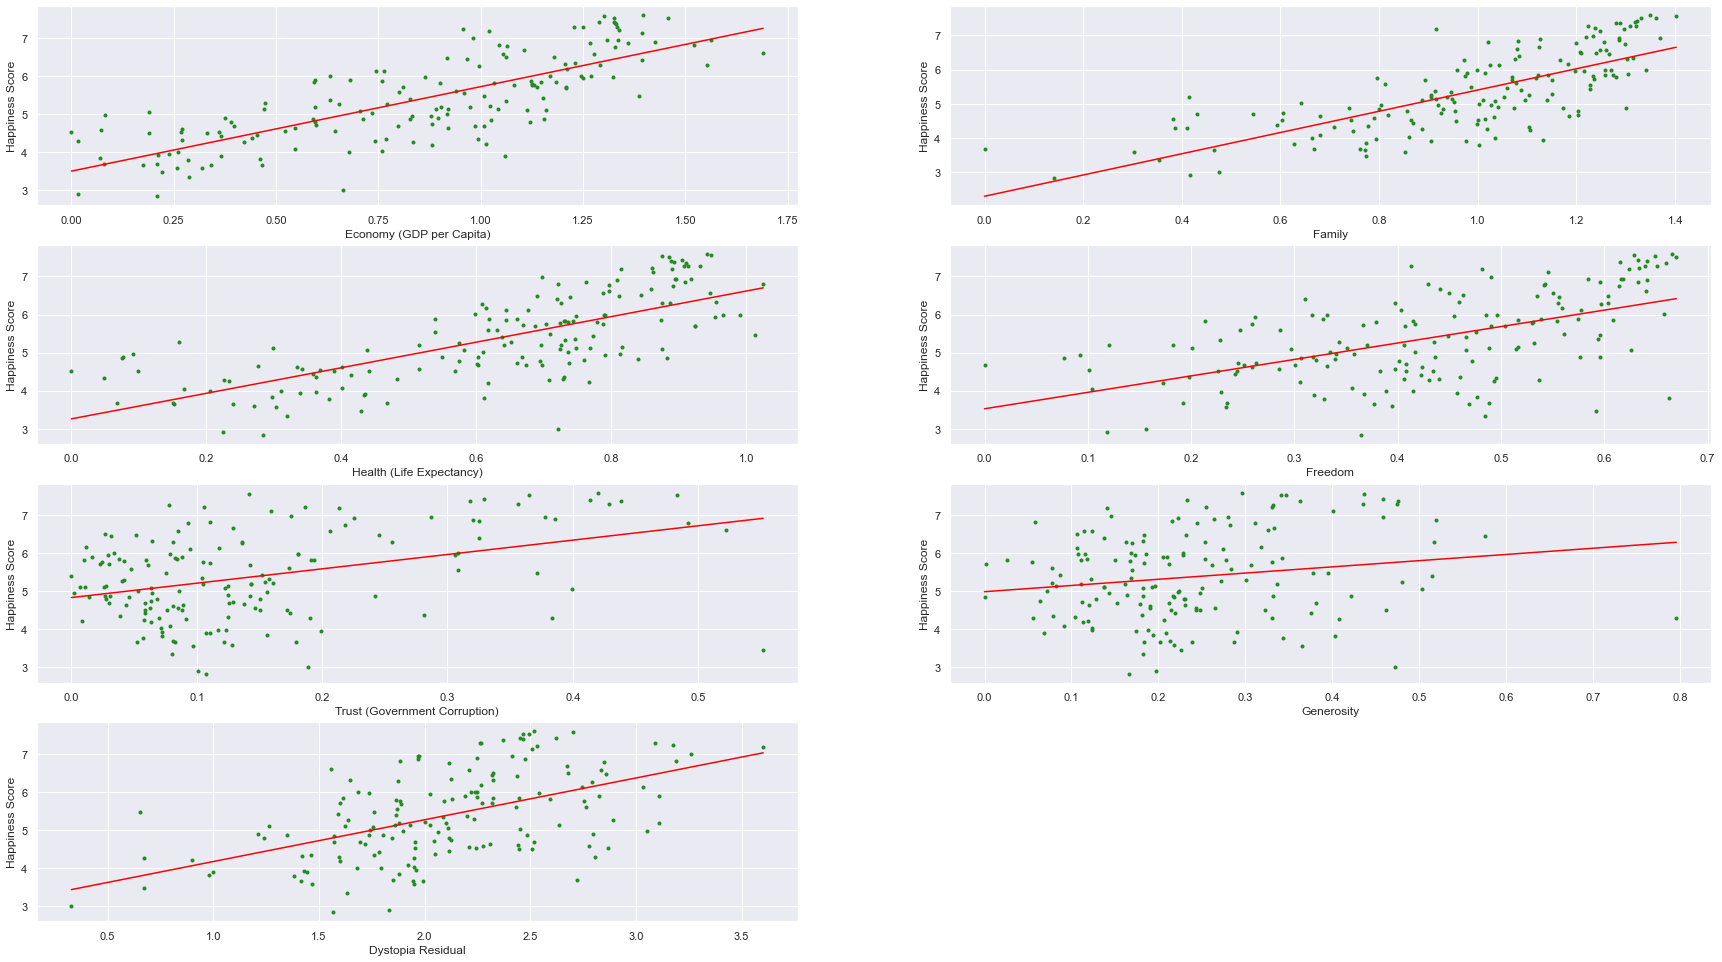

In [123]:

plt.figure(figsize=(30,30))
plt.title("Independent variables vs Happiness Score")
for i, col in enumerate(happiness_df.columns[5:13]):
    plt.subplot(7, 2, i+1)
    x = happiness_df[col]
    y = happiness_df['Happiness Score']
    plt.plot(x, y, '.', color="forestgreen")
    # create linear regression line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('Happiness Score')

#### Compute and plot a correlation matrix between the independent variables (similar to how I demonstrated in the Regression.Boston.ipynb Jupyter notebook). This will show you how independent all the input variables are between each other.

<AxesSubplot:>

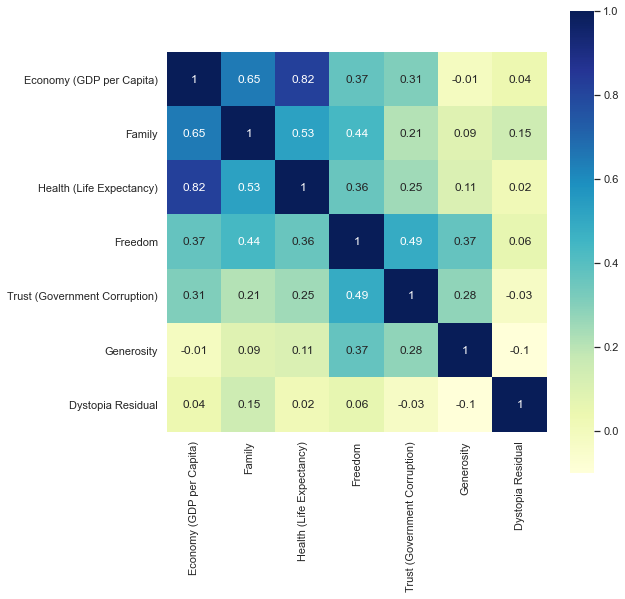

In [124]:
features = happiness_df[['Economy (GDP per Capita)','Family','Health (Life Expectancy)','Freedom','Trust (Government Corruption)','Generosity', 'Dystopia Residual']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [125]:
Y = happiness_df.pop("Happiness Score")
del happiness_df["Country"]
del happiness_df["Region"]
del happiness_df['Happiness Rank']
del happiness_df["Standard Error"]

#### Break the data into the training and test datasets.

In [126]:
X_train, X_test, Y_train, Y_test = train_test_split(happiness_df, Y, test_size=0.2, random_state=0)

#### Train a linear regression model to predict the output/dependent variable (Happiness Score) based on the input variables I specified in the description of this assignment.

In [127]:
model = linear_model.LinearRegression().fit(X_train, Y_train)
X_train.head()

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
16,1.56391,1.21963,0.91894,0.61583,0.37798,0.28034,1.96961
130,0.01604,0.41134,0.22562,0.43054,0.06977,0.33128,2.80791
134,0.88180,0.74700,0.61712,0.17288,0.06324,0.11291,1.59927
22,1.04424,1.25596,0.72052,0.42908,0.11069,0.05841,3.19131
93,0.08308,1.02626,0.09131,0.34037,0.15603,0.22269,3.05137


#### Report (print out) the mean squared error and coefficient of determination for the test data as your model performance indicators. Remember to use the set aside test data for this.

In [128]:
# The coefficients:
print('Coefficients: \n', model.coef_)
X_test.head()

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Coefficients: 
 [1.00010263 0.99995379 0.99986239 0.99968513 0.99990488 0.9999532
 1.00003023]
Mean squared error: 0.00
Coefficient of determination: 1.00
